### Loading Data

In [1]:
import pandas as pd

labeled_vectara = pd.read_csv("data/generated/test_labeled_vectara.csv")
labeled_bayes = pd.read_csv("data/generated/naive_bayes_predictions.csv")
labeled_fc = pd.read_csv("data/generated/test_labeled_fc.csv")

In [4]:
labeled_bayes["correct"] = [True if true == pred else False for true, pred in zip(labeled_bayes["label"], labeled_bayes["predicted_label"])]
labeled_vectara["correct"] = [True if true == pred else False for true, pred in zip(labeled_vectara["true_labels"], labeled_vectara["predicted_vectara"])]
labeled_fc["correct"] = [True if true == pred else False for true, pred in zip(labeled_fc["label"], labeled_fc["predicted_fc"])]


In [65]:
labeled_bayes["true_labels"] = [1 if l == "Hallucination" else 0 for l in labeled_bayes["label"]]
labeled_bayes["predicted_labels"] = [1 if l == "Hallucination" else 0 for l in labeled_bayes["predicted_label"]]

labeled_bayes.rename(columns = {"tgt_src": "tgt"}, inplace=True)

In [5]:
labeled_fc["true_labels"] = [1 if l == "Hallucination" else 0 for l in labeled_fc["label"]]
labeled_fc["predicted_labels"] = [1 if l == "Hallucination" else 0 for l in labeled_fc["predicted_fc"]]

labeled_fc.rename(columns = {"tgt_src": "tgt"}, inplace=True)

### Functions to analyze data quantitatively

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def detailed_analysis(df_results, true_label_col, pred_label_col, hyp_col, tgt_col):
    # Extracting true and predicted labels
    true_labels = df_results[true_label_col]
    pred_labels = df_results[pred_label_col]

    # Generating classification report
    print("Classification Report:")
    print(classification_report(true_labels, pred_labels))

    # Generating confusion matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(true_labels, pred_labels)
    print(cm)

    # Plotting confusion matrix
    plt.matshow(cm, cmap='Greens')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Computing average length of hypothesis and target entries
    hyp_lengths = df_results[hyp_col].apply(len)
    tgt_lengths = df_results[tgt_col].apply(len)

    avg_hyp_length = hyp_lengths.mean()
    avg_tgt_length = tgt_lengths.mean()

    print(f"Average Hypothesis Length: {avg_hyp_length:.2f}")
    print(f"Average Target Length: {avg_tgt_length:.2f}")

    # Calculating precision and recall
    tp = cm[1, 1]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tn = cm[0, 0]

    try:
        precision = tp / (tp + fp)
    except ZeroDivisionError:
        precision = 0

    recall = tp / (tp + fn)
    accuracy = (tn + tp) / len(true_labels)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Accuracy: {accuracy:.2f}")

    return {
        'classification_report': classification_report(true_labels, pred_labels, output_dict=True),
        'confusion_matrix': cm,
        'avg_hyp_length': avg_hyp_length,
        'avg_tgt_length': avg_tgt_length,
        'precision': precision,
        'recall': recall
    }

In [17]:
def comparing_lengths(df, hyp_tokens, tgt_tokens):

    correct_df = df[df["correct"] == True]
    incorrect_df = df[df["correct"] == False]

    length_dif_correct = correct_df[tgt_tokens].apply(len) - correct_df[hyp_tokens].apply(len)
    length_dif_incorrect = incorrect_df[tgt_tokens].apply(len) - incorrect_df[hyp_tokens].apply(len)

    mean_dif_cor = length_dif_correct.mean()
    mean_dif_incor = length_dif_incorrect.mean()

    print("Mean Difference for correctly classified sentences:", mean_dif_cor)
    print("Mean Difference for incorrectly classified sentences:", mean_dif_incor)

### Evaluation of Vectara Model

#### Quantitative Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       889
           1       0.61      0.73      0.66       611

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.69      1500
weighted avg       0.71      0.70      0.70      1500

Confusion Matrix:
[[600 289]
 [164 447]]


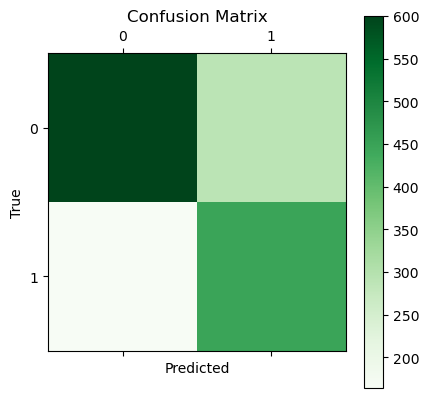

Average Hypothesis Length: 35.05
Average Target Length: 41.45
Precision: 0.61
Recall: 0.73
Accuracy: 0.70


{'classification_report': {'0': {'precision': 0.7853403141361257,
   'recall': 0.6749156355455568,
   'f1-score': 0.7259528130671506,
   'support': 889.0},
  '1': {'precision': 0.6073369565217391,
   'recall': 0.7315875613747954,
   'f1-score': 0.6636971046770601,
   'support': 611.0},
  'accuracy': 0.698,
  'macro avg': {'precision': 0.6963386353289325,
   'recall': 0.7032515984601762,
   'f1-score': 0.6948249588721054,
   'support': 1500.0},
  'weighted avg': {'precision': 0.7128336131345322,
   'recall': 0.698,
   'f1-score': 0.700593987849587,
   'support': 1500.0}},
 'confusion_matrix': array([[600, 289],
        [164, 447]], dtype=int64),
 'avg_hyp_length': 35.04666666666667,
 'avg_tgt_length': 41.45333333333333,
 'precision': 0.6073369565217391,
 'recall': 0.7315875613747954}

In [11]:
detailed_analysis(labeled_vectara, "true_labels", "predicted_vectara", "hyp", "tgt")

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       371
           1       0.56      0.68      0.61       192

    accuracy                           0.71       563
   macro avg       0.69      0.70      0.69       563
weighted avg       0.73      0.71      0.71       563

Confusion Matrix:
[[268 103]
 [ 62 130]]


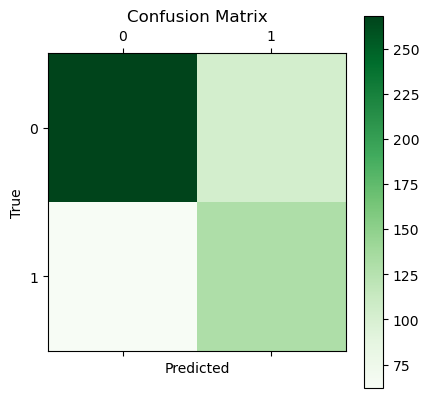

Average Hypothesis Length: 32.75
Average Target Length: 36.69
Precision: 0.56
Recall: 0.68
Accuracy: 0.71


{'classification_report': {'0': {'precision': 0.8121212121212121,
   'recall': 0.7223719676549866,
   'f1-score': 0.7646219686162625,
   'support': 371.0},
  '1': {'precision': 0.5579399141630901,
   'recall': 0.6770833333333334,
   'f1-score': 0.611764705882353,
   'support': 192.0},
  'accuracy': 0.7069271758436945,
  'macro avg': {'precision': 0.6850305631421512,
   'recall': 0.69972765049416,
   'f1-score': 0.6881933372493078,
   'support': 563.0},
  'weighted avg': {'precision': 0.7254377144161333,
   'recall': 0.7069271758436945,
   'f1-score': 0.7124930264405775,
   'support': 563.0}},
 'confusion_matrix': array([[268, 103],
        [ 62, 130]], dtype=int64),
 'avg_hyp_length': 32.746003552397866,
 'avg_tgt_length': 36.685612788632326,
 'precision': 0.5579399141630901,
 'recall': 0.6770833333333334}

In [12]:
detailed_analysis(labeled_vectara[labeled_vectara["task"]=="DM"], "true_labels", "predicted_vectara", "hyp", "tgt")

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       336
           1       0.65      0.64      0.65       226

    accuracy                           0.72       562
   macro avg       0.71      0.70      0.71       562
weighted avg       0.72      0.72      0.72       562

Confusion Matrix:
[[258  78]
 [ 81 145]]


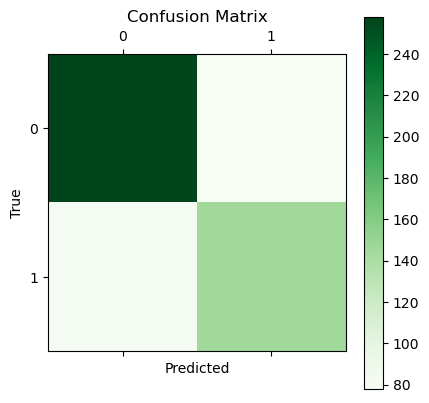

Average Hypothesis Length: 33.70
Average Target Length: 35.08
Precision: 0.65
Recall: 0.64
Accuracy: 0.72


{'classification_report': {'0': {'precision': 0.7610619469026548,
   'recall': 0.7678571428571429,
   'f1-score': 0.7644444444444445,
   'support': 336.0},
  '1': {'precision': 0.6502242152466368,
   'recall': 0.6415929203539823,
   'f1-score': 0.6458797327394209,
   'support': 226.0},
  'accuracy': 0.7170818505338078,
  'macro avg': {'precision': 0.7056430810746458,
   'recall': 0.7047250316055627,
   'f1-score': 0.7051620885919327,
   'support': 562.0},
  'weighted avg': {'precision': 0.7164901900445407,
   'recall': 0.7170818505338078,
   'f1-score': 0.7167653966769438,
   'support': 562.0}},
 'confusion_matrix': array([[258,  78],
        [ 81, 145]], dtype=int64),
 'avg_hyp_length': 33.70284697508897,
 'avg_tgt_length': 35.07651245551602,
 'precision': 0.6502242152466368,
 'recall': 0.6415929203539823}

In [37]:
detailed_analysis(labeled_vectara[labeled_vectara["task"]=="MT"], "true_labels", "predicted_vectara", "hyp", "tgt")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       278
           1       0.53      0.45      0.49        97

    accuracy                           0.75       375
   macro avg       0.67      0.66      0.66       375
weighted avg       0.74      0.75      0.75       375

Confusion Matrix:
[[239  39]
 [ 53  44]]


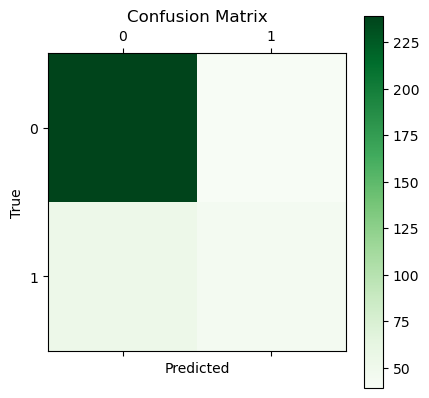

Average Hypothesis Length: 27.27
Average Target Length: 23.86
Precision: 0.53
Recall: 0.45
Accuracy: 0.75


{'classification_report': {'0': {'precision': 0.8184931506849316,
   'recall': 0.8597122302158273,
   'f1-score': 0.8385964912280702,
   'support': 278.0},
  '1': {'precision': 0.5301204819277109,
   'recall': 0.4536082474226804,
   'f1-score': 0.4888888888888889,
   'support': 97.0},
  'accuracy': 0.7546666666666667,
  'macro avg': {'precision': 0.6743068163063213,
   'recall': 0.6566602388192538,
   'f1-score': 0.6637426900584795,
   'support': 375.0},
  'weighted avg': {'precision': 0.7439007536997305,
   'recall': 0.7546666666666667,
   'f1-score': 0.7481387914230021,
   'support': 375.0}},
 'confusion_matrix': array([[239,  39],
        [ 53,  44]], dtype=int64),
 'avg_hyp_length': 27.272,
 'avg_tgt_length': 23.856,
 'precision': 0.5301204819277109,
 'recall': 0.4536082474226804}

In [38]:
detailed_analysis(labeled_vectara[labeled_vectara["task"]=="PG"], "true_labels", "predicted_vectara", "hyp", "tgt")

#### Analysis of Length Differences

In [ ]:
print("Overall:")
comparing_lengths(labeled_vectara, "hyp_tokens", "tgt_tokens")
print("DM:")
comparing_lengths(labeled_vectara[labeled_vectara["task"]=="DM"], "hyp_tokens", "tgt_tokens")
print("MT:")
comparing_lengths(labeled_vectara[labeled_vectara["task"]=="MT"], "hyp_tokens", "tgt_tokens")
print("PG:")
comparing_lengths(labeled_vectara[labeled_vectara["task"]=="PG"], "hyp_tokens", "tgt_tokens")

#### Qualitative Analysis

In [27]:
incor_inst = labeled_vectara[labeled_vectara["correct"] == False]
incor_inst_mt = incor_inst[incor_inst["task"] == "MT"]
incor_inst_dm = incor_inst[incor_inst["task"] == "DM"]
incor_inst_pg = incor_inst[incor_inst["task"] == "PG"]

In [11]:
def show_problems(df):

    for i in range(len(df)):
        print("Model Output:", df["hyp"].iloc[i])
        print("Correct Output:", df["tgt"].iloc[i])
        print("Correct Label:", df["label"].iloc[i])
        print("\n")

In [31]:
show_problems(incor_inst_dm)

Model Output: Made of twigs or twigs.
Correct Output: Made of twine; having the appearance of twine.
Correct Label: Hallucination


Model Output: (informal) Glamorous.
Correct Output: Marked by glamour or glamorousness; glamorous
Correct Label: Not Hallucination


Model Output: (informal) Fun, exciting.
Correct Output: (slang) Excitingly fun or enticing.
Correct Label: Not Hallucination


Model Output: The act of ungrasping.
Correct Output: The act of ungrasping; the release of something that is grasped.
Correct Label: Not Hallucination


Model Output: (uncountable) The process of making something gender-neutral.
Correct Output: The process or result of genderizing.
Correct Label: Hallucination


Model Output: The fear or dislike of drugs.
Correct Output: The irrational fear or avoidance of a medicine, or of medicines in general.
Correct Label: Not Hallucination


Model Output: (transitive) To undo the damage of.
Correct Output: (transitive) To undo the destruction of; to restore or re

### Evaluation of Naive Bayes

#### Quantitative Analysis

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.62      0.51       502
           1       0.75      0.58      0.65       998

    accuracy                           0.59      1500
   macro avg       0.59      0.60      0.58      1500
weighted avg       0.64      0.59      0.60      1500

Confusion Matrix:
[[313 189]
 [424 574]]


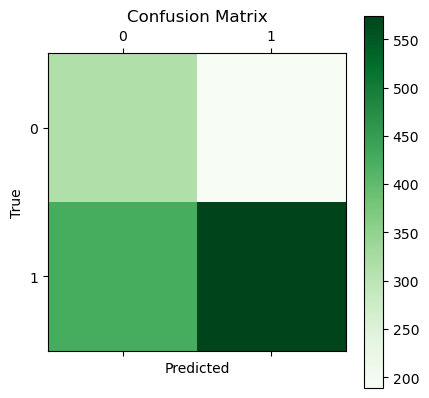

Average Hypothesis Length: 35.05
Average Target Length: 41.45
Precision: 0.75
Recall: 0.58
Accuracy: 0.59


{'classification_report': {'0': {'precision': 0.42469470827679784,
   'recall': 0.6235059760956175,
   'f1-score': 0.5052461662631155,
   'support': 502.0},
  '1': {'precision': 0.7522935779816514,
   'recall': 0.5751503006012024,
   'f1-score': 0.6519023282226007,
   'support': 998.0},
  'accuracy': 0.5913333333333334,
  'macro avg': {'precision': 0.5884941431292247,
   'recall': 0.5993281383484099,
   'f1-score': 0.5785742472428581,
   'support': 1500.0},
  'weighted avg': {'precision': 0.6426571562537604,
   'recall': 0.5913333333333334,
   'f1-score': 0.602821399353493,
   'support': 1500.0}},
 'confusion_matrix': array([[313, 189],
        [424, 574]], dtype=int64),
 'avg_hyp_length': 35.04666666666667,
 'avg_tgt_length': 41.45333333333333,
 'precision': 0.7522935779816514,
 'recall': 0.5751503006012024}

In [59]:
detailed_analysis(labeled_bayes, "true_labels", "predicted_labels", "hyp", "tgt_src")

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.06      0.11       129
           1       0.78      0.97      0.86       434

    accuracy                           0.76       563
   macro avg       0.57      0.51      0.48       563
weighted avg       0.68      0.76      0.69       563

Confusion Matrix:
[[  8 121]
 [ 14 420]]


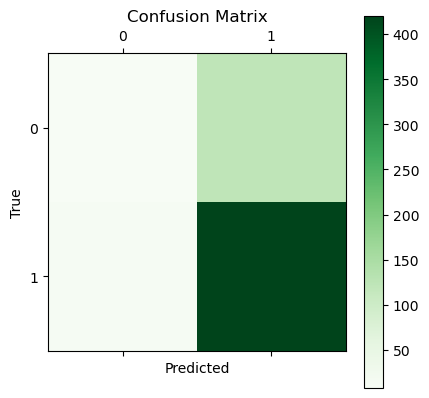

Average Hypothesis Length: 41.57
Average Target Length: 59.54
Precision: 0.78
Recall: 0.97
Accuracy: 0.76


{'classification_report': {'0': {'precision': 0.36363636363636365,
   'recall': 0.06201550387596899,
   'f1-score': 0.10596026490066225,
   'support': 129.0},
  '1': {'precision': 0.7763401109057301,
   'recall': 0.967741935483871,
   'f1-score': 0.8615384615384616,
   'support': 434.0},
  'accuracy': 0.7602131438721137,
  'macro avg': {'precision': 0.5699882372710469,
   'recall': 0.51487871967992,
   'f1-score': 0.4837493632195619,
   'support': 563.0},
  'weighted avg': {'precision': 0.6817774405722519,
   'recall': 0.7602131438721137,
   'f1-score': 0.6884130843337083,
   'support': 563.0}},
 'confusion_matrix': array([[  8, 121],
        [ 14, 420]], dtype=int64),
 'avg_hyp_length': 41.56660746003553,
 'avg_tgt_length': 59.53996447602132,
 'precision': 0.7763401109057301,
 'recall': 0.967741935483871}

In [60]:
detailed_analysis(labeled_bayes[labeled_bayes["task"] == "DM"], "true_labels", "predicted_labels", "hyp", "tgt_src")

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.84      0.54       210
           1       0.72      0.25      0.37       352

    accuracy                           0.47       562
   macro avg       0.56      0.54      0.46       562
weighted avg       0.60      0.47      0.43       562

Confusion Matrix:
[[176  34]
 [264  88]]


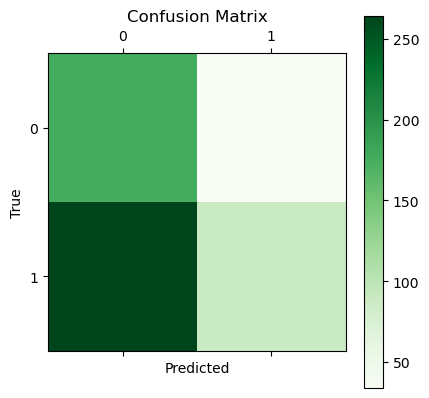

Average Hypothesis Length: 33.70
Average Target Length: 35.08
Precision: 0.72
Recall: 0.25
Accuracy: 0.47


{'classification_report': {'0': {'precision': 0.4,
   'recall': 0.8380952380952381,
   'f1-score': 0.5415384615384615,
   'support': 210.0},
  '1': {'precision': 0.7213114754098361,
   'recall': 0.25,
   'f1-score': 0.37130801687763715,
   'support': 352.0},
  'accuracy': 0.4697508896797153,
  'macro avg': {'precision': 0.5606557377049181,
   'recall': 0.5440476190476191,
   'f1-score': 0.45642323920804934,
   'support': 562.0},
  'weighted avg': {'precision': 0.6012484685840966,
   'recall': 0.4697508896797153,
   'f1-score': 0.4349172577651338,
   'support': 562.0}},
 'confusion_matrix': array([[176,  34],
        [264,  88]], dtype=int64),
 'avg_hyp_length': 33.70284697508897,
 'avg_tgt_length': 35.07651245551602,
 'precision': 0.7213114754098361,
 'recall': 0.25}

In [62]:
detailed_analysis(labeled_bayes[labeled_bayes["task"] == "MT"], "true_labels", "predicted_labels", "hyp", "tgt_src")

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.79      0.59       163
           1       0.66      0.31      0.42       212

    accuracy                           0.52       375
   macro avg       0.56      0.55      0.51       375
weighted avg       0.58      0.52      0.50       375

Confusion Matrix:
[[129  34]
 [146  66]]


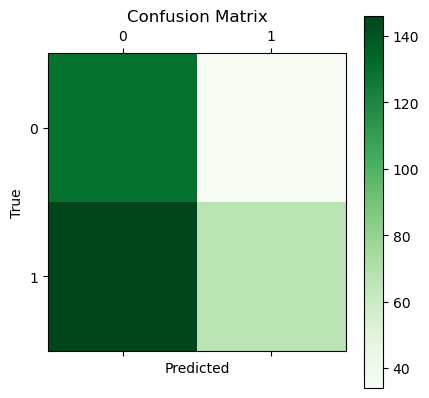

Average Hypothesis Length: 27.27
Average Target Length: 23.86
Precision: 0.66
Recall: 0.31
Accuracy: 0.52


{'classification_report': {'0': {'precision': 0.4690909090909091,
   'recall': 0.7914110429447853,
   'f1-score': 0.589041095890411,
   'support': 163.0},
  '1': {'precision': 0.66,
   'recall': 0.3113207547169811,
   'f1-score': 0.4230769230769231,
   'support': 212.0},
  'accuracy': 0.52,
  'macro avg': {'precision': 0.5645454545454546,
   'recall': 0.5513658988308832,
   'f1-score': 0.506059009483667,
   'support': 375.0},
  'weighted avg': {'precision': 0.5770181818181819,
   'recall': 0.52,
   'f1-score': 0.4952160168598525,
   'support': 375.0}},
 'confusion_matrix': array([[129,  34],
        [146,  66]], dtype=int64),
 'avg_hyp_length': 27.272,
 'avg_tgt_length': 23.856,
 'precision': 0.66,
 'recall': 0.3113207547169811}

In [63]:
detailed_analysis(labeled_bayes[labeled_bayes["task"] == "PG"], "true_labels", "predicted_labels", "hyp", "tgt_src")

#### Qualitative Analysis

In [68]:
incor_inst_nb = labeled_bayes[labeled_bayes["correct"] == False]
incor_inst_mt_nb = incor_inst_nb[incor_inst_nb["task"] == "MT"]
incor_inst_dm_nb = incor_inst_nb[incor_inst_nb["task"] == "DM"]
incor_inst_pg_nb = incor_inst_nb[incor_inst_nb["task"] == "PG"]

In [70]:
show_problems(incor_inst_mt)

Model Output: You don't know what?
Correct Output: Did you really not know that?
Correct Label: Not Hallucination


Model Output: How much did the doctor give you your release?
Correct Output: How long did the doctor sign you off school for?
Correct Label: Not Hallucination


Model Output: You've got a scarce vocabulary.
Correct Output: You have a meager vocabulary.
Correct Label: Not Hallucination


Model Output: Leave him open.
Correct Output: Leave it open.
Correct Label: Hallucination


Model Output: I'm not staying at the bus.
Correct Output: I didn't get on the bus.
Correct Label: Hallucination


Model Output: We were relieved because our leadership required an impossible one.
Correct Output: We quite the job because the bosses made impossible demands.
Correct Label: Hallucination


Model Output: Tom has his hands in his blood.
Correct Output: Tom has blood on his hands.
Correct Label: Hallucination


Model Output: Why are we so angry with Tom?
Correct Output: What did we do that

### Comparison of Models

In [52]:
# Function to show when Vectara performed better
def vectara_outperformed(df_vectara, df_bayes):

    number = 0

    for i in range(len(df_bayes)):

        if df_vectara["correct"].iloc[i] == True and df_bayes["correct"].iloc[i] == False:

            print("Model Output:", df_vectara["hyp"].iloc[i])
            print("Correct Output:", df_vectara["tgt"].iloc[i])
            print("Correct Label:", df_vectara["label"].iloc[i])
            print("\n")

            number += 1
    
    print(f"Vectara outperformed Bayes {number} times.")

In [53]:
vectara_outperformed(labeled_vectara[labeled_vectara["task"] == "DM"], labeled_bayes[labeled_bayes["task"] == "DM"])

Model Output: (anatomy) Relating to the diaphragm.
Correct Output: (medicine) Below the diaphragm.
Correct Label: Hallucination


Model Output: (informal) Drama associated with teenagers.
Correct Output: (television, film) A drama based on teenagers, or set in a teenage environment
Correct Label: Not Hallucination


Model Output: Not a romance.
Correct Output: Not of or pertaining to romance.
Correct Label: Not Hallucination


Model Output: (uncountable) The state of being initiated.
Correct Output: The act of initiating, or the process of being initiated or introduced
Correct Label: Not Hallucination


Model Output: (obsolete) An entreaty.
Correct Output: (obsolete) Entreaty.
Correct Label: Not Hallucination


Model Output: (psychology) The landscape of trauma.
Correct Output: A landscape, real or figurative, defined by the traumatic events that have occurred there.
Correct Label: Hallucination


Model Output: Resembling or characteristic of a dream.
Correct Output: Resembling a dream

# Evaluation of Feature Classifier

## Quantitative Analysis

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.41      0.53       129
           1       0.85      0.96      0.90       434

    accuracy                           0.83       563
   macro avg       0.80      0.69      0.72       563
weighted avg       0.83      0.83      0.82       563

Confusion Matrix:
[[ 53  76]
 [ 17 417]]


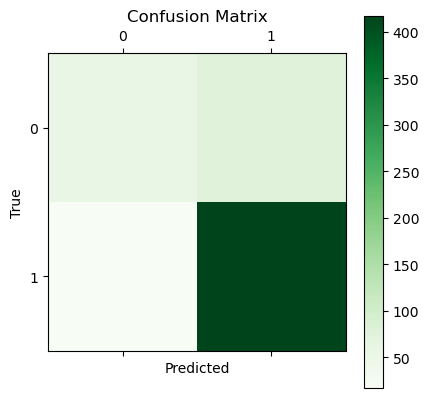

Average Hypothesis Length: 41.57
Average Target Length: 59.54
Precision: 0.85
Recall: 0.96
Accuracy: 0.83


{'classification_report': {'0': {'precision': 0.7571428571428571,
   'recall': 0.4108527131782946,
   'f1-score': 0.5326633165829145,
   'support': 129.0},
  '1': {'precision': 0.845841784989858,
   'recall': 0.9608294930875576,
   'f1-score': 0.8996763754045307,
   'support': 434.0},
  'accuracy': 0.8348134991119005,
  'macro avg': {'precision': 0.8014923210663576,
   'recall': 0.6858411031329261,
   'f1-score': 0.7161698459937227,
   'support': 563.0},
  'weighted avg': {'precision': 0.8255182295861935,
   'recall': 0.8348134991119005,
   'f1-score': 0.8155827970954925,
   'support': 563.0}},
 'confusion_matrix': array([[ 53,  76],
        [ 17, 417]], dtype=int64),
 'avg_hyp_length': 41.56660746003553,
 'avg_tgt_length': 59.53996447602132,
 'precision': 0.845841784989858,
 'recall': 0.9608294930875576}

In [8]:
detailed_analysis(labeled_fc[labeled_fc["task"]=="DM"], "true_labels", "predicted_labels", "hyp", "tgt")

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       163
           1       0.74      0.67      0.70       212

    accuracy                           0.68       375
   macro avg       0.68      0.68      0.68       375
weighted avg       0.69      0.68      0.68       375

Confusion Matrix:
[[114  49]
 [ 71 141]]


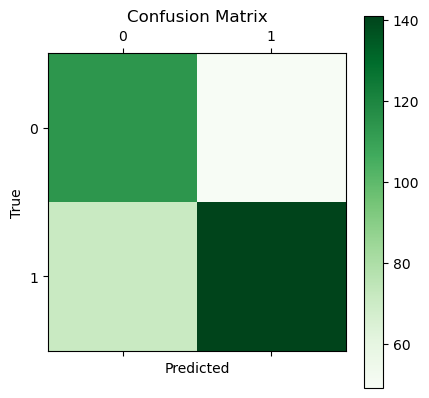

Average Hypothesis Length: 27.27
Average Target Length: 23.86
Precision: 0.74
Recall: 0.67
Accuracy: 0.68


{'classification_report': {'0': {'precision': 0.6162162162162163,
   'recall': 0.6993865030674846,
   'f1-score': 0.6551724137931034,
   'support': 163.0},
  '1': {'precision': 0.7421052631578947,
   'recall': 0.6650943396226415,
   'f1-score': 0.7014925373134329,
   'support': 212.0},
  'accuracy': 0.68,
  'macro avg': {'precision': 0.6791607396870555,
   'recall': 0.682240421345063,
   'f1-score': 0.6783324755532681,
   'support': 375.0},
  'weighted avg': {'precision': 0.6873854907539118,
   'recall': 0.68,
   'f1-score': 0.6813587236232631,
   'support': 375.0}},
 'confusion_matrix': array([[114,  49],
        [ 71, 141]], dtype=int64),
 'avg_hyp_length': 27.272,
 'avg_tgt_length': 23.856,
 'precision': 0.7421052631578947,
 'recall': 0.6650943396226415}

In [9]:
detailed_analysis(labeled_fc[labeled_fc["task"]=="PG"], "true_labels", "predicted_labels", "hyp", "tgt")

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       210
           1       0.81      0.70      0.75       352

    accuracy                           0.71       562
   macro avg       0.70      0.71      0.70       562
weighted avg       0.73      0.71      0.71       562

Confusion Matrix:
[[152  58]
 [105 247]]


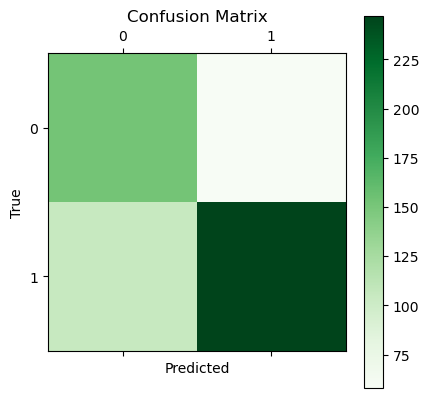

Average Hypothesis Length: 33.70
Average Target Length: 35.08
Precision: 0.81
Recall: 0.70
Accuracy: 0.71


{'classification_report': {'0': {'precision': 0.5914396887159533,
   'recall': 0.7238095238095238,
   'f1-score': 0.6509635974304069,
   'support': 210.0},
  '1': {'precision': 0.8098360655737705,
   'recall': 0.7017045454545454,
   'f1-score': 0.7519025875190258,
   'support': 352.0},
  'accuracy': 0.7099644128113879,
  'macro avg': {'precision': 0.7006378771448619,
   'recall': 0.7127570346320347,
   'f1-score': 0.7014330924747163,
   'support': 562.0},
  'weighted avg': {'precision': 0.7282288784916681,
   'recall': 0.7099644128113879,
   'f1-score': 0.7141851712937412,
   'support': 562.0}},
 'confusion_matrix': array([[152,  58],
        [105, 247]], dtype=int64),
 'avg_hyp_length': 33.70284697508897,
 'avg_tgt_length': 35.07651245551602,
 'precision': 0.8098360655737705,
 'recall': 0.7017045454545454}

In [10]:
detailed_analysis(labeled_fc[labeled_fc["task"]=="MT"], "true_labels", "predicted_labels", "hyp", "tgt")

## Qualitative Analysis

In [12]:
incor_inst = labeled_fc[labeled_fc["correct"] == False]
incor_inst_mt = incor_inst[incor_inst["task"] == "MT"]
incor_inst_dm = incor_inst[incor_inst["task"] == "DM"]
incor_inst_pg = incor_inst[incor_inst["task"] == "PG"]

In [13]:
show_problems(incor_inst_mt)

Model Output: Is your watch going well?
Correct Output: Is your watch right?
Correct Label: Hallucination


Model Output: Does it make sense to do it?
Correct Output: Does it make sense to fix this?
Correct Label: Not Hallucination


Model Output: Tom has already chosen where to provide him with documents?
Correct Output: Has Tom chosen where he's going to apply yet?
Correct Label: Hallucination


Model Output: What's going to happen to him?
Correct Output: What will become of him?
Correct Label: Not Hallucination


Model Output: How much did the doctor give you your release?
Correct Output: How long did the doctor sign you off school for?
Correct Label: Hallucination


Model Output: The decision of tactical exercises, understanding of the difficult ending, watching a live match and trying to “ Guess” moves that will be played. All this is fun.
Correct Output: Solving a tactical exercise, understanding a difficult ending, following a live match and trying to "guess" the moves that will

In [14]:
show_problems(incor_inst_pg)

Model Output: Here she comes, here she comes.
Correct Output: Here she comes.
Correct Label: Not Hallucination


Model Output: It turns me into madness.
Correct Output: It's turning me into a crazy person.
Correct Label: Hallucination


Model Output: I'm--I'm joking.
Correct Output: I'm joking.
Correct Label: Not Hallucination


Model Output: Why did you have to go do that?
Correct Output: Why'd you got to go and do that?
Correct Label: Hallucination


Model Output: You need to restrain yourself.
Correct Output: You need to contain yourself.
Correct Label: Not Hallucination


Model Output: YOU DID ALL YOU COULD.
Correct Output: You did all you could do.
Correct Label: Hallucination


Model Output: Afraid we did everything we could.
Correct Output: Afraid we've done all we can.
Correct Label: Hallucination


Model Output: I-I can't tell you.
Correct Output: I can't tell you.
Correct Label: Hallucination


Model Output: Please, sir, listen to me.
Correct Output: Please, sir, hear me.
Cor

In [16]:
show_problems(incor_inst_dm)

Model Output: (anatomy) Relating to the diaphragm.
Correct Output: (medicine) Below the diaphragm.
Correct Label: Not Hallucination


Model Output: (informal) Glamorous.
Correct Output: Marked by glamour or glamorousness; glamorous
Correct Label: Not Hallucination


Model Output: (informal) Drama associated with teenagers.
Correct Output: (television, film) A drama based on teenagers, or set in a teenage environment
Correct Label: Not Hallucination


Model Output: Not a romance.
Correct Output: Not of or pertaining to romance.
Correct Label: Not Hallucination


Model Output: (informal) Fun, exciting.
Correct Output: (slang) Excitingly fun or enticing.
Correct Label: Not Hallucination


Model Output: (transitive) To cause to tilt.
Correct Output: (transitive) To tilt too far.
Correct Label: Hallucination


Model Output: (transitive) To undo the damage of.
Correct Output: (transitive) To undo the destruction of; to restore or recreate.
Correct Label: Not Hallucination


Model Output: Ext

## Analysis of Length Differences

In [22]:
print("Overall:")
comparing_lengths(labeled_fc, "hyp_tokens", "tgt_src_tokens")
print("DM:")
comparing_lengths(labeled_fc[labeled_fc["task"]=="DM"], "hyp_tokens", "tgt_src_tokens")
print("MT:")
comparing_lengths(labeled_fc[labeled_fc["task"]=="MT"], "hyp_tokens", "tgt_src_tokens")
print("PG:")
comparing_lengths(labeled_fc[labeled_fc["task"]=="PG"], "hyp_tokens", "tgt_src_tokens")

Overall:
Mean Difference for correctly classified sentences: 9.951067615658364
Mean Difference for incorrectly classified sentences: 7.292553191489362
DM:
Mean Difference for correctly classified sentences: 24.76808510638298
Mean Difference for incorrectly classified sentences: 32.11827956989247
MT:
Mean Difference for correctly classified sentences: 1.593984962406015
Mean Difference for incorrectly classified sentences: 3.3251533742331287
PG:
Mean Difference for correctly classified sentences: -4.2823529411764705
Mean Difference for incorrectly classified sentences: -6.558333333333334


In [21]:
labeled_fc.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'tgt', 'hyp', 'label', 'hyp_normalized',
       'tgt_src_normalized', 'hyp_sentences', 'tgt_src_sentences',
       'hyp_tokens', 'tgt_src_tokens', 'hyp_lemmas', 'tgt_src_lemmas', 'task',
       'overlap', 'semantic_similarity', 'bleu_score', 'entity_overlap',
       'predicted_fc', 'correct', 'true_labels', 'predicted_labels'],
      dtype='object')